<a href="https://colab.research.google.com/github/xvh422/L4-Project/blob/main/Merger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install eagleSqlTools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
from mpl_toolkits.axes_grid1 import make_axes_locatable

con = sql.connect("vwg533", password = "FZtn087h")

In [32]:
sim_name = 'RefL0100N1504'
sim_size = 100.

Query_IDs = "SELECT \
            (MAG.u_nodust - MAG.r_nodust) as u_minus_r, \
            log10(AP.Mass_Star) as mass, \
            (AP.SFR/AP.Mass_Star) as ssfr, \
            SH.GalaxyID as id \
           FROM \
            %s_SubHalo as SH, \
            %s_Magnitudes as MAG, \
            %s_Aperture as AP \
           WHERE \
            SH.SnapNum = 27 and \
            SH.SubGroupNumber = 0 and \
            AP.Mass_Star > 1.0e9 and \
            AP.ApertureSize = 30 and \
            SH.GalaxyID = MAG.GalaxyID and \
            SH.GalaxyID = AP.GalaxyID"%(sim_name, sim_name, sim_name)

Data_IDs = sql.execute_query(con, Query_IDs)

In [36]:
for i in range(len(Data_IDs['id'])):
  print('ID:' ,Data_IDs['id'][i])
  print('u-r:' ,Data_IDs['u_minus_r'][i])
  print('Mass:' ,Data_IDs['mass'][i])
  print('sSFR:' ,Data_IDs['ssfr'][i])
  print('')

Streaming output truncated to the last 5000 lines.
ID: 13594583
u-r: 1.6755257
Mass: 9.203481413225946
sSFR: 3.081371e-11

ID: 13607676
u-r: 1.7805977
Mass: 9.006596617321927
sSFR: 2.4652565e-11

ID: 13792384
u-r: 2.3689842
Mass: 10.339785703091033
sSFR: 5.835776e-13

ID: 4332524
u-r: 1.4903526
Mass: 9.183119069199972
sSFR: 5.2043005e-11

ID: 20391000
u-r: 2.2337055
Mass: 10.9941015857653
sSFR: 1.2610267e-12

ID: 20532195
u-r: 1.2004547
Mass: 11.345517715366086
sSFR: 9.231704e-11

ID: 11724877
u-r: 1.3560905
Mass: 9.58455720136723
sSFR: 8.323886e-11

ID: 11730600
u-r: 0.9866867
Mass: 9.677942089958686
sSFR: 2.35952e-10

ID: 11771855
u-r: 1.3808765
Mass: 9.577788823685504
sSFR: 8.901155e-11

ID: 11778621
u-r: 1.3288536
Mass: 9.441090918968882
sSFR: 9.5378414e-11

ID: 11794065
u-r: 1.0932522
Mass: 9.431052597492734
sSFR: 1.9752672e-10

ID: 11801846
u-r: 2.0292034
Mass: 10.031873250389694
sSFR: 1.3643501e-11

ID: 11802821
u-r: 1.1692085
Mass: 9.521269704170265
sSFR: 1.4217753e-10

ID: 118

In [29]:
sim_name = 'RefL0100N1504'
sim_size = 100.
galaxy_id_1 = 10247408
galaxy_id_2 = 10153845

# Red
Query_1 = "SELECT \
            gal.Redshift as z, \
            gal.MassType_Star as mass \
          FROM \
            %s_Subhalo as gal, \
            %s_Subhalo as ref \
          WHERE \
            ref.GalaxyID=%s and \
            ((gal.SnapNum > ref.SnapNum and ref.GalaxyID \
            between gal.GalaxyID and gal.TopLeafID) or \
            (gal.SnapNum <= ref.SnapNum and gal.GalaxyID \
            between ref.GalaxyID and ref.TopLeafID)) \
          ORDER BY \
            gal.Redshift"%(sim_name, sim_name, galaxy_id_1)

# Blue
Query_2 = "SELECT \
            gal.Redshift as z, \
            gal.MassType_Star as mass \
          FROM \
            %s_Subhalo as gal, \
            %s_Subhalo as ref \
          WHERE \
            ref.GalaxyID=%s and \
            ((gal.SnapNum > ref.SnapNum and ref.GalaxyID \
            between gal.GalaxyID and gal.TopLeafID) or \
            (gal.SnapNum <= ref.SnapNum and gal.GalaxyID \
            between ref.GalaxyID and ref.TopLeafID)) \
          ORDER BY \
            gal.Redshift"%(sim_name, sim_name, galaxy_id_2)

Data_1 = sql.execute_query(con, Query_1)
Data_2 = sql.execute_query(con, Query_2)
print(len(Data_1['z']))
print(len(Data_2['z']))

27
26


In [7]:
def log_with_zeros(data): # Replaces zeroes with the smallest nonzero value.
  logs = np.empty(len(data))
  for i in range(0, len(data)):
    if data[i] == 0.0:
      logs[i] = 99.
    else:
      logs[i] = np.log10(data[i])
  m = logs.min()
  for j in range(0, len(logs)):
    if logs[j] == 99.:
      logs[j] = m
    else:
      logs[j] = logs[j]
  return logs

In [30]:
Times = np.array([13.62, 13.53, 13.32, 13.25, 13.16, 13.04, 12.86, 12.75, 12.63, 12.46, 12.25, 12.01, 11.66, 11.16,
                  10.86, 10.53, 10.05, 9.49, 8.86, 7.93, 7.37, 6.71, 6.01, 5.19, 4.16, 3.23, 2.29, 1.24, 0.0]) # len = 29

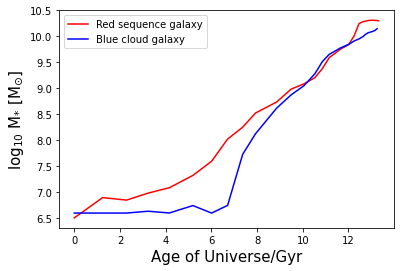

In [31]:
plt.plot(Times[2:29], log_with_zeros(Data_1['mass']), color = 'r', label = 'Red sequence galaxy')
plt.plot(Times[3:29], log_with_zeros(Data_2['mass']), color = 'b', label = 'Blue cloud galaxy')
plt.xlabel(r'Age of Universe/Gyr', fontsize=15)
plt.ylabel(r'log$_{10}$ M$_{*}$ [M$_{\odot}$]', fontsize=15)
plt.legend()
plt.show()